# 03.- Exploratory Data Analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))

# Set Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel", font="sans-serif")
sns.set_context("notebook", font_scale=0.8)

# Display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [2]:
# Load your dataset
df = pd.read_csv("../data/processed/features.csv").drop(['Date'], axis=1)

In [3]:
# Basic data overview
print("Shape of the dataset:", df.shape)

print("Summary of numerical features:")
print(df.describe())

print("Data types and null counts:")
print(df.info())

print("Check for missing values:")
print(df.isnull().sum())
print("First five rows of the dataset:")
df.head()

Shape of the dataset: (103, 7)
Summary of numerical features:
       Abs Extrema Duration  Low Threshold Count  Pattern Extrema Duration  \
count               103.000              103.000                   103.000   
mean                  0.556                0.050                     0.158   
std                   0.238                0.028                     0.122   
min                   0.067                0.000                     0.033   
25%                   0.400                0.033                     0.067   
50%                   0.533                0.067                     0.133   
75%                   0.750                0.067                     0.200   
max                   0.967                0.100                     0.600   

       Min Deviation  Min Mean   Label  
count        103.000   103.000 103.000  
mean           0.283     0.164   0.495  
std            0.116     0.133   0.502  
min            0.012     0.009   0.000  
25%            0.203     0.054

,Abs Extrema Duration,Low Threshold Count,Max Between Min,Pattern Extrema Duration,Min Deviation,Min Mean,Label
0,0.700,0.033,False,0.100,0.384,0.262,0.000
1,0.367,0.033,False,0.200,0.483,0.382,0.000
2,0.700,0.067,True,0.067,0.012,0.009,1.000
3,0.467,0.067,True,0.133,0.386,0.088,0.000
4,0.567,0.000,False,0.067,0.084,0.480,0.000


## Correlation Heatmap

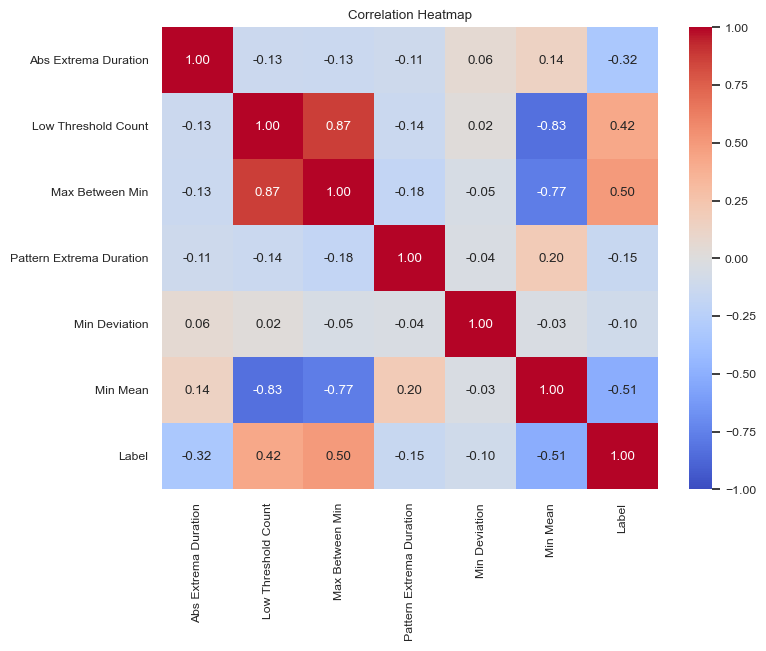

In [4]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**Analysis**

- Correlation between *Low Threshold Count* and *Max Between Min*:
  
  The strong correlation of 0.87 indicates that contain similar information, which may cause multicollinearity. This may cause the linear models to fail to correctly separate the individual contribution of *Low Threshold Count* and *Max Between Min*.

- Relationship of *Low Threshold Count* and *Max Between Min* with the dependent variable: 
  
  *Low Threshold Count* has a correlation of 0.42 and *Max Between Min* has 0.5, which means that both have a moderate relationship with the dependent variable. Despite the high correlation between *Low Threshold Count* and *Max Between Min*, both are relevant for predicting the dependent variable.

- Relationship of *Min Mean* with the dependent variable:
  
  Characteristic *Min Mean* has a correlation of -0.51 with the dependent variable, indicating that it has a strong, but inverse relationship. In addition, *Min Mean* is negatively correlated with *Low Threshold Count* and *Max Between Min* (correlation of -0.83 and -0.77), suggesting that *Min Mean* offers a different perspective on the data.

**Conclusions**

- Multicollinearity:
  
  The strong correlation between *Low Threshold Count* and *Max Between Min* may generate multicollinearity problems, especially in linear models. This could make it difficult to interpret the coefficients of these characteristics.

- Complementarity of *Min Mean*:
  
  Although *Min Mean* is inversely correlated with *Low Threshold Count* and *Max Between Min*, its negative relationship with the dependent variable suggests that *Min Mean* could contribute additional and valuable information to the model. *Min Mean* is not redundant with *Low Threshold Count* and *Max Between Min*, but offers a different perspective.

**Recommendations**

- Linear Models:
  Since *Low Threshold Count* and *Max Between Min* are strongly correlated, it is advisable to apply regularization techniques such as Ridge or Lasso to mitigate the effects of multicollinearity and improve model stability.
  
  If multicollinearity is still a problem, dimensionality reduction using Principal Component Analysis (PCA) could be considered to combine *Low Threshold Count* and *Max Between Min* into a single feature, keeping the most relevant information.


- Nonlinear Models:
  In nonlinear models such as decision trees, random forests or XGBoost, multicollinearity is not such a significant problem, since these models do not depend directly on the feature coefficients.
  
  Keeping *Low Threshold Count*, *Max Between Min* and *Min Mean* in the data will be beneficial for capturing complex and nonlinear patterns in the data. The inverse relationship between *Min Mean* and the rest of the features can help improve the predictive ability of the model, as *Min Mean* brings a different perspective.

**In summary, it is advisable to keep all three features *Low Threshold Count*, *Max Between Min* and *Min Mean* in the data set, especially if using nonlinear models. However, if linear models are planned to be used, applying regularization or dimensionality reduction techniques would be beneficial to avoid the negative effects of multicollinearity.**

## Pairplot

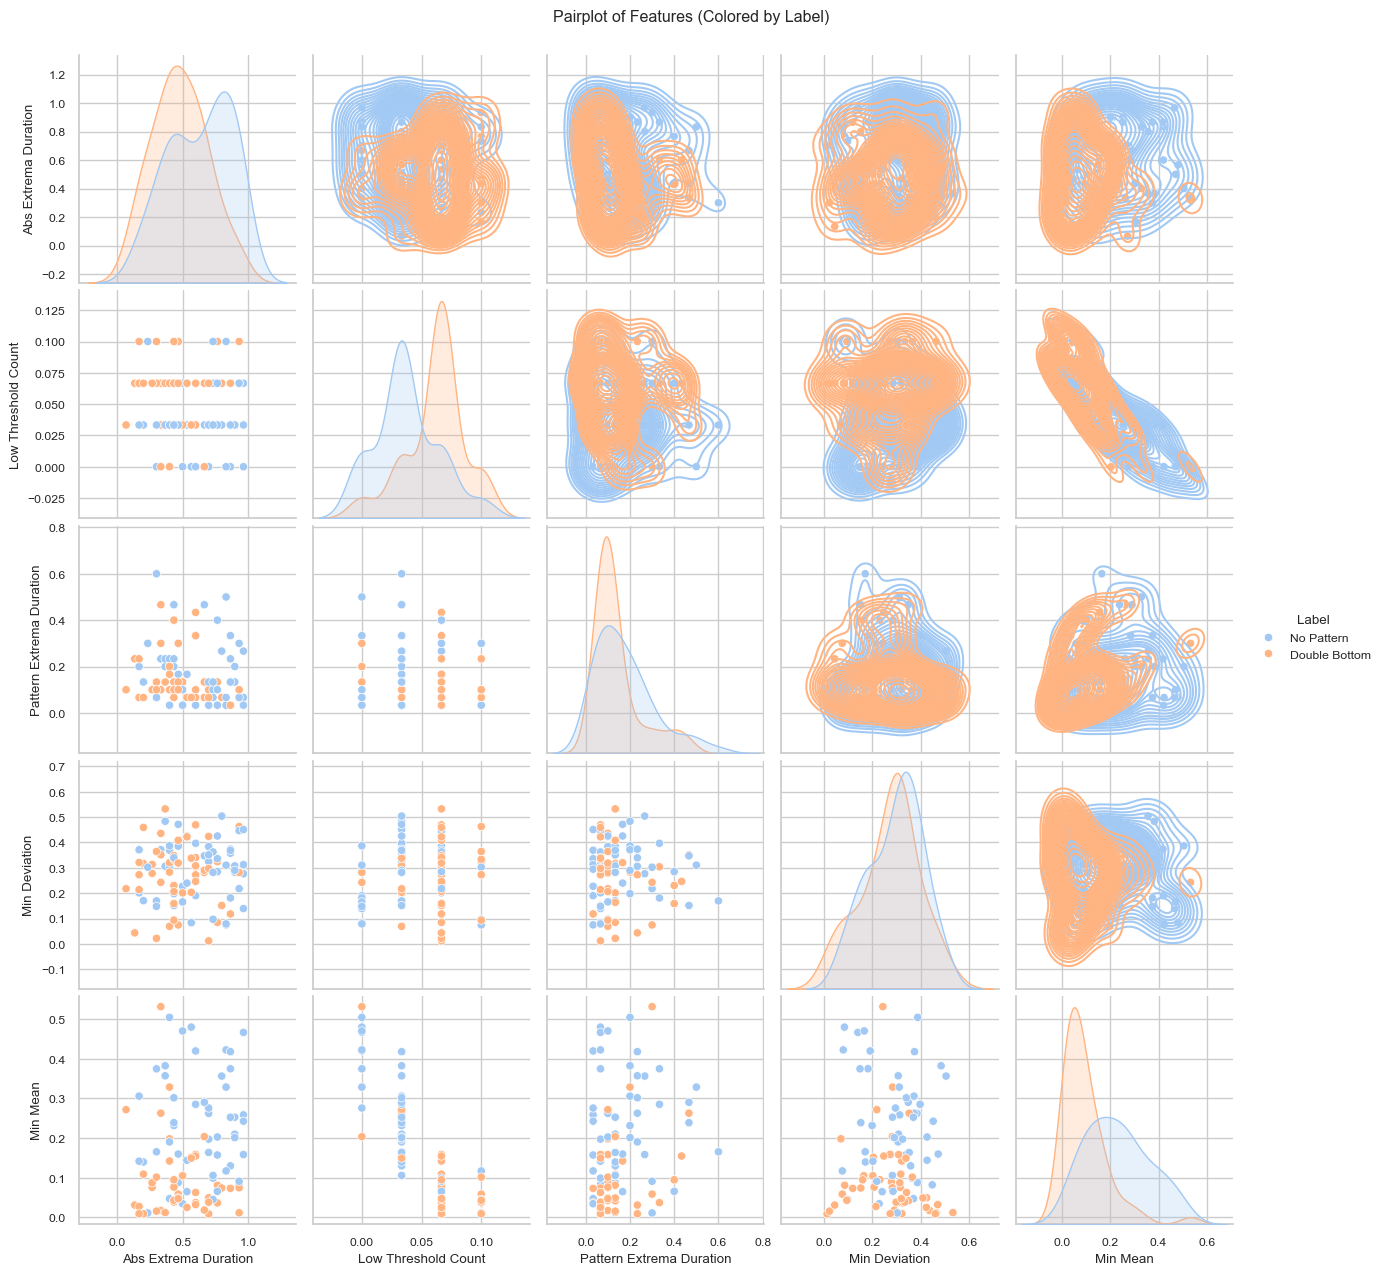

In [5]:
df['Label Numeric'] = df['Label']
df['Label'] = df['Label'].replace({0: 'No Pattern', 1: 'Double Bottom'})
num_columns = ['Abs Extrema Duration', 'Low Threshold Count', 'Pattern Extrema Duration', 'Min Deviation', 'Min Mean']
# Pairplot to visualize relationships and distributions
g = sns.pairplot(df, hue='Label', vars=num_columns, diag_kind='kde')
g.map_upper(sns.kdeplot, n_levels=30)
plt.suptitle("Pairplot of Features (Colored by Label)", y=1.02)
plt.show()

**Analysis**

- Focus on Numerical Features:
  
  In this analysis, only numerical features were considered, excluding the binary feature. This ensures a focus on continuous variables, which are better suited for scatter and KDE plots to uncover underlying patterns. Binary features typically require separate treatment as they do not exhibit distributional properties conducive to such visualizations.

- Inverse Relationship Between *Low Threshold Count* and *Min Mean*:
  
  The scatter plot revealed a strong inverse relationship. This suggests that as the count of low thresholds increases, the mean of minima decreases, possibly reflecting a balancing behavior in the dataset's structure. Understanding this interaction can help refine feature engineering efforts, as one variable might partially explain the variance captured by the other.

- Lack of Definitive Label Separation in KDE Plots
  
  The KDE plots showed substantial overlap between the two labels across different feature combinations. While this indicates that individual features do not clearly differentiate the classes, it also highlights the potential for combined feature sets to improve classification. Such overlap suggests that complex relationships exist, which models can leverage to resolve the apparent contradictions.
  
  Despite the observed overlap, the aggregate effect of multiple features could capture the intricacies required for effective classification. This aligns with the hypothesis that individual features are not independently powerful, but collectively, they may form a more discriminative basis for the model. It underscores the need for multidimensional analysis and careful preprocessing to optimize classification outcomes.

**Conclusions**

The data suggest that the combination of numerical features could provide valuable information for classification, despite the lack of separation evident in the KDE plots. The inverse relationship between some variables, such as Low Threshold Count and Min Mean, indicates that they could be capturing complementary aspects of label behavior. However, the lack of clear separation in each combination of two features implies that neither individually is powerful enough to fully discriminate between classes.


**Recommendations**

- Feature Engineering:
  
  Evaluate possible nonlinear transformations or combinations of existing features. For example, introducing quadratic or logarithmic interactions could increase the discriminative capacity of the features.

- Model Evaluation: 
  
  Use nonlinear algorithms, such as decision trees, Random Forests or gradient-based models, which can better handle complex relationships and observed overlap.

- Cross-Validation:
  
  Validate results with multiple training/test splits to ensure model stability against feature mixing.

**In summary, the need for nonlinear modeling and, potentially, a new iteration of feature engineering to improve classifier performance is suggested. The analysis highlights the importance of considering complementary relationships and additional explorations in transformations and dimensionality reductions to maximize the efficiency of the final model.**

## Boolean Class Max Between Min (Boolean)

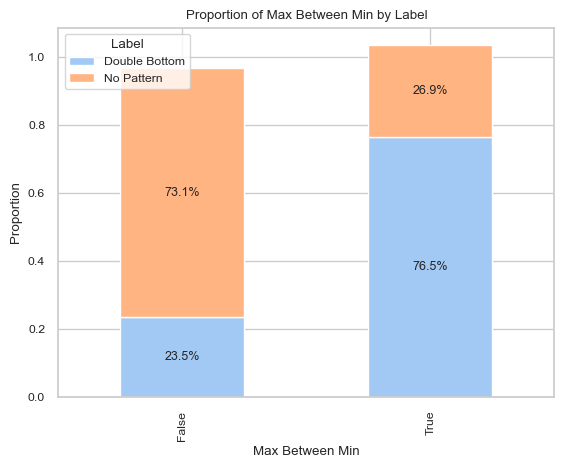

In [6]:
for column in df.select_dtypes(include=['bool']).columns:

    cross_tab = pd.crosstab(df[column], df['Label'], normalize='columns')

    ax = cross_tab.plot(kind='bar', stacked=True)
    
    for container in ax.containers:
        ax.bar_label(container,
                     label_type='center',
                     fontsize=9,
                     labels=[
                         f'{v*100:.1f}%'
                         for v in container.datavalues
                         ])
    
    plt.title(f'Proportion of {column} by Label')
    plt.ylabel('Proportion')
    plt.xlabel(column)
    plt.show()

**Conclusions**

- Predictive Power:
  
  This feature likely has predictive power, especially for distinguishing the "Double Bottom" label when it is True, as 76.5% of these cases correspond to the "Double Bottom" class. However, there is still 26.9% uncertainty where the label does not match.

- Possible Misclassifications:
  
  Given the approximately 25% overlap in both cases (False and True values), there could be misclassifications, suggesting that the Boolean feature, although informative, is not perfectly correlated with the target labels.

**Recommendations**

- Feature Engineering:
  
  The feature may be useful, but it might require further refinement or interaction with other features to improve its predictive power. Combining this feature with others could help reduce the misclassification percentage.

- Model Considerations:
  
  Models that can handle uncertainty or noise in the data, such as decision trees or ensemble methods, might perform better with this feature, as they can better manage such distributions.

This kind of feature provides useful insight, but might not be strong enough alone for clear classification without support from other features.

## Class Distribution

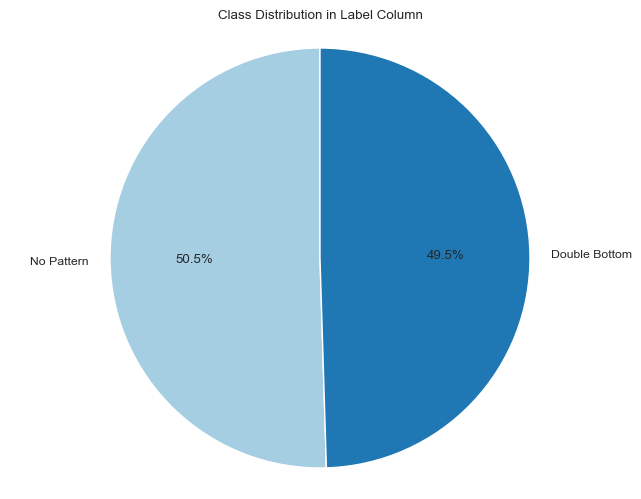

In [7]:
# Count the frequency of each class in the Label column
class_counts = df['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Class Distribution in Label Column')
plt.axis('equal')
plt.show()

- Model Performance:
  Classifiers are unlikely to be biased toward a specific class since the distribution is nearly even.
  Accuracy will be a meaningful metric, as the classes are evenly represented.

- Data Integrity:
  
  No significant data imbalance issues need to be addressed (e.g., no need for techniques like oversampling or undersampling).

- Validation and Generalization:
  
  Models trained on this dataset are likely to generalize better, as both classes have nearly equal representation in the training process.
  
- Practical Implication:
  The near-even distribution reflects a fair and unbiased scenario, which is ideal for most machine learning tasks.

Such balance ensures that any patterns learned by the model represent actual trends in the data, not biases caused by uneven class representation

## Outlier Detection

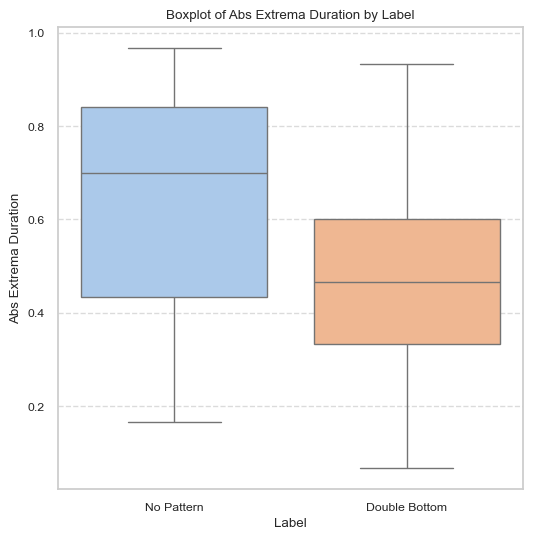

Feature: Abs Extrema Duration
Label No Pattern: 0

Label Double Bottom: 0



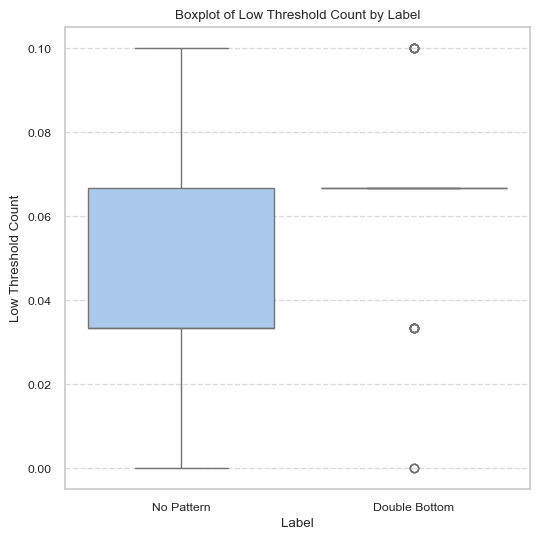

Feature: Low Threshold Count
Label No Pattern: 0

Label Double Bottom: 19
     Low Threshold Count
9                  0.100
15                 0.100
17                 0.033
21                 0.033
25                 0.100
28                 0.033
34                 0.033
36                 0.033
37                 0.033
49                 0.000
52                 0.033
65                 0.033
68                 0.000
75                 0.100
91                 0.000
93                 0.100
96                 0.100
99                 0.033
101                0.100


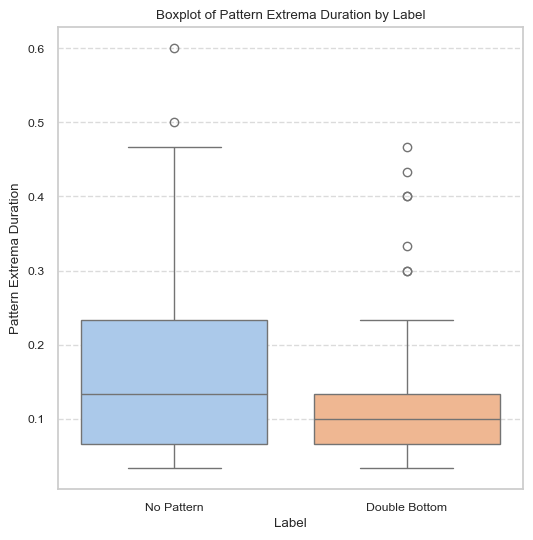

Feature: Pattern Extrema Duration
Label No Pattern: 2
    Pattern Extrema Duration
76                     0.600
82                     0.500
Label Double Bottom: 7
    Pattern Extrema Duration
15                     0.300
21                     0.467
41                     0.400
54                     0.333
79                     0.433
91                     0.300
94                     0.400


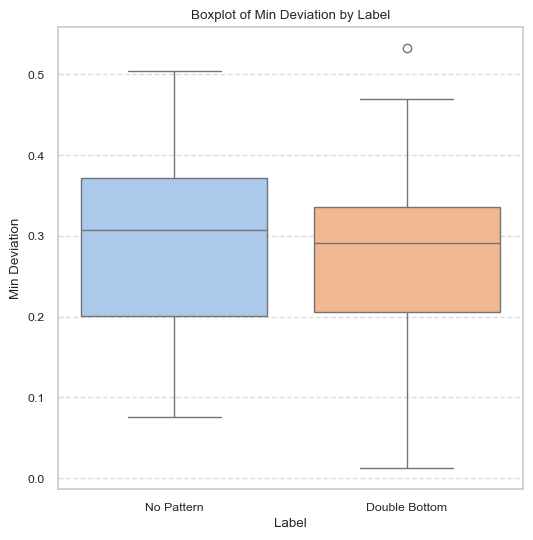

Feature: Min Deviation
Label No Pattern: 0

Label Double Bottom: 1
    Min Deviation
29          0.532


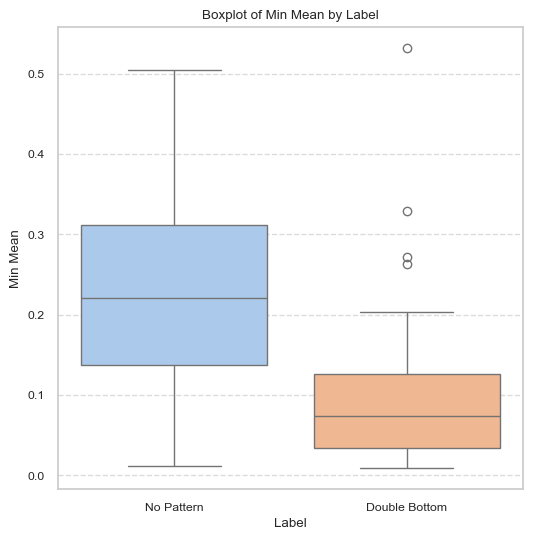

Feature: Min Mean
Label No Pattern: 0

Label Double Bottom: 4
    Min Mean
21     0.263
34     0.272
49     0.329
91     0.532


In [8]:
# Function to calculate outliers using IQR for each feature and label
def detect_outliers_by_label(df):
    outliers = {}
    for feature in df.select_dtypes(include=['float64', 'int64']).columns:
            outliers[feature] = {}

            if feature != 'Label Numeric':
            
                for label in df['Label'].unique():
                    subset = df[df['Label'] == label]
                    Q1 = subset[feature].quantile(0.25)
                    Q3 = subset[feature].quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR

                    # Identify outliers for this subset
                    label_outliers = subset[(subset[feature] < lower_bound) | 
                                            (subset[feature] > upper_bound)]
                    outliers[feature][label] = label_outliers

    return outliers

outliers = detect_outliers_by_label(df)

# Create boxplots for each feature, grouped by 'Label'
for feature in df.select_dtypes(include=['float64', 'int64']).columns:
    if feature != 'Label Numeric': 
        plt.figure(figsize=(6, 6))
        sns.boxplot(data=df, x='Label', y=feature, hue='Label', palette="pastel", dodge=False)
        plt.title(f"Boxplot of {feature} by Label")
        plt.xlabel("Label")
        plt.ylabel(feature)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend([], [], frameon=False)
        plt.show()

        print(f'Feature: {feature}')
        # Print outliers for each label
        for label in df['Label'].unique():
            label_outliers = outliers[feature][label]
            print(f'Label {label}: {len(label_outliers)}')
            print(label_outliers[[feature]] if not label_outliers[[feature]].empty else '')

    

**Conclusions**

In the dataset, we observed a significant number of outliers in *Low Threshold Count*, one of the most correlated features with the label *Double Bottom*. Interestingly, despite their presence, the correlation between this feature and the label remains substantial, suggesting that these outliers may still carry useful information. However, since they cannot be removed due to the nature of the analysis, they will need to be handled with caution during the modeling phase.

**Recommendations**

- Robust Modeling: 
  
  It is important to consider using models that are robust to outliers, such as Random Forest or Gradient Boosting. These models handle outliers well and can maintain predictive performance without requiring the removal of such values.

- Model Evaluation:
  
  When training the model, we need to ensure to evaluate the model’s performance both with and without these outliers to understand their true impact on the predictive power.

- Dispense with *Low Threshold Count* feature:
  
  As we have verified in the previous analyses, the high correlation between *Low Threshold Count* and *Max Between Min* would allow us to consider eliminating *Low Threshold Count* (due to the large number of Outlayers) and keeping only *Max Between Min* for training. However, in the iterative training process we could evaluate training with both and only one of them, and thus verify which option has a better performance.
